In [1]:
import torch
from matplotlib import pyplot as plt 

torch.manual_seed(1)            



# KL Evolution

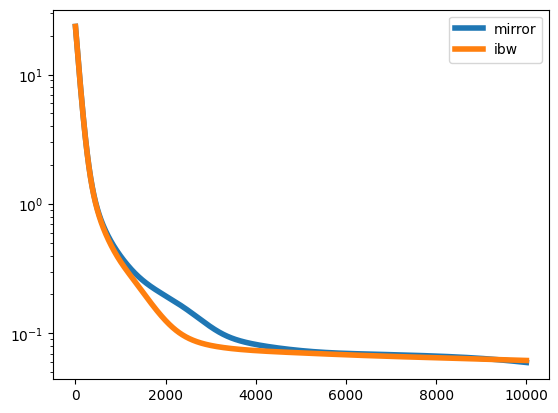

In [2]:
your_folder = "saved/2025-01-31_12-18"
optims = ["mirror", "ibw"]
prefix = "d2_N10_lrmu0.1_lre0.1_it10000_B100_"

for o in optims:
    kl =torch.load(f"{your_folder}/{o}/0/{prefix}kls_evolution.pt")
    plt.semilogy(kl, label = o, lw=4)

plt.legend()



# Figures

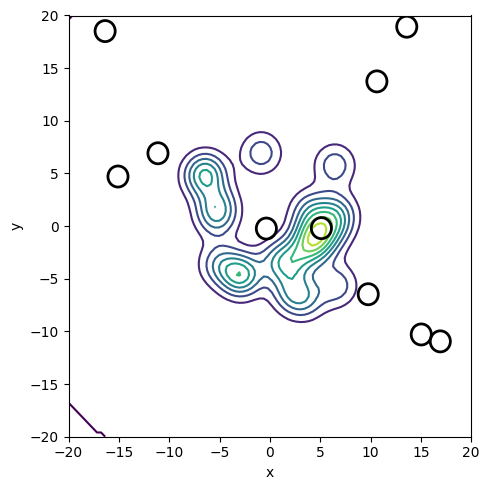

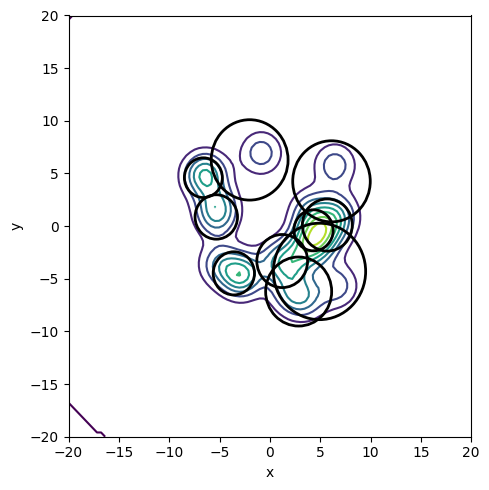

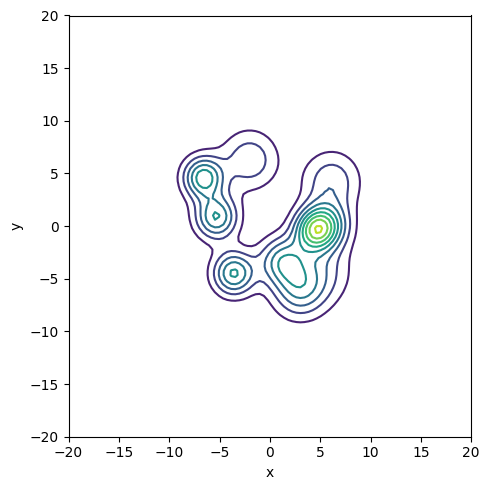

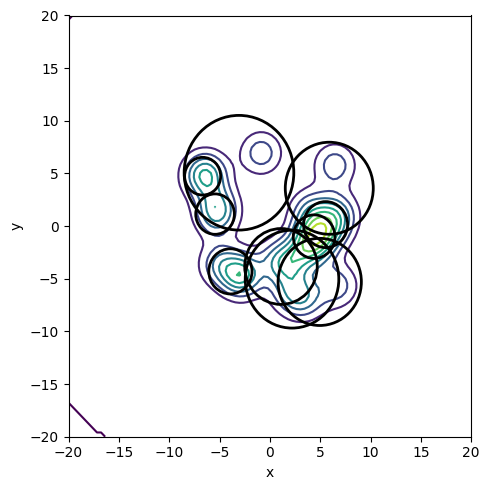

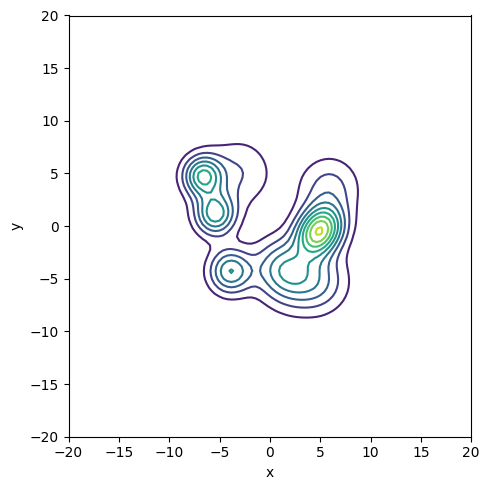

In [4]:
from src.plot import plot_target_and_initial_gaussians,  plot_estimated

pi_mean = torch.load(f"{your_folder}/init/pi_mean.pt")
pi_cov = torch.load(f"{your_folder}/init/pi_cov.pt")

mu_init = torch.load(f"{your_folder}/init/mu_init_N10_xp0.pt")
epsilon_init = torch.load(f"{your_folder}/init/epsilon_init_N10_xp0.pt")
plot_target_and_initial_gaussians(f"figures/init.pdf", pi_mean, pi_cov, mu_init, epsilon_init)

for o in optims:
    mu_final = torch.load(f"{your_folder}/{o}/0/{prefix}mus.pt")
    epsilon_final = torch.load(f"{your_folder}/{o}/0/{prefix}epsilons.pt")    
    plot_target_and_initial_gaussians(f"figures/{o}/final.pdf", pi_mean, pi_cov, mu_final, epsilon_final)
    plot_estimated(f"figures/{o}/approx.pdf", mu_final, epsilon_final)